#라이브러리 임포트

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import load_iris # load_iris 하기 위해서
from sklearn.model_selection import train_test_split # _(언더바) 사용은 함수 / 훈련과 테스트셋 분리해주는 함수
from sklearn.preprocessing import StandardScaler, MinMaxScaler #변환기(특정 스케일링)
from sklearn.neighbors import KNeighborsClassifier #KNN 분류기(모델) -변수선언 -> 메서드호출
from sklearn.metrics import confusion_matrix, classification_report #모델평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #모델평가지표

# 데이터준비

## 다중 클래스 분류: Setosa, Versicolor, Virginica 품종 분류
* KNN 모델 생성
* 모델 훈련
* 모델 평가(정확도)
* k값에 따른 정확도의 변화를 시각화

In [4]:
iris = load_iris()

In [5]:
type(iris) #> Bunch

sklearn.utils.Bunch

`bunch`: Python의 `dict` 클래스와 비슷.
* `key:value` 형식으로 아이템들을 저장하는 데이터 타입
* `bunch['key']` 또는 `bunch.key` 형식으로 value들을 사용할 수 있음.

In [6]:
iris.keys() #Bunch 객체의 key들의 집합을 리턴.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['data']

In [ ]:
print(iris['DESCR'])
# 데이터셋의 정보확인

In [35]:
# Bunch 객체의 속성들 중에서 특성 배열(X), 타겟 배열(y)만 리턴.
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [34]:
# Bunch 객체의 속성들 중에서 특성 데이터프레임으로(X), 타겟은 배열(y)로 리턴.
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
X =iris['data'].copy()
y =iris['target'].copy()

In [38]:
X.shape, y.shape
#> 특성배열(150 샘플, 4개 특성), 타겟 배열(150샘플)

((150, 4), (150,))

In [39]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y[:5]

array([0, 0, 0, 0, 0])

In [40]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

# 이진 분류: Setosa, Setosa가 아닌 것을 분류
* KNN 모델 생성
* 모델 훈련
* 모델 평가(정확도)
* k값에 따른 정확도의 변화를 시각화

In [42]:
# 이진 분류에서 사용할 타겟 배열(0:setosa, 1: non-setosa)
# y[y==2] = 1
# y[y!=0] = 1
y = np.where(y ==0, 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 훈련/테스트셋 분리

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #30%, 훈련셋은 자동으로 70%
                                                    stratify=y, #
                                                    random_state=42)
# shuffle = True 가 기본값

In [44]:
X_train.shape, X_test.shape #70%

((120, 4), (30, 4))

In [46]:
# 훈련 셋의 타겟 비율
np.unique(y_train, return_counts=True) #비율이 1:2

(array([0, 1]), array([40, 80]))

In [45]:
y_train.shape, y_test.shape #30%

((120,), (30,))

In [47]:
np.unique(y_test, return_counts=True) #비율이 1:2

(array([0, 1]), array([10, 20]))

## 표준화(스케일링)

* scaler = StandardScaler()
* scaler.fit(X_train)
* scaler.transform(X_train)
 * scaler.fit_transform(X_train) 위 두개의 코드를 하나로 합친것
* scaler.transform(X_test)

In [49]:
# 표준화 특성 스케일 변환기 생성 (sclaer 객체 생성)
std_scaler = StandardScaler()

In [50]:
std_scaler_train = std_scaler.fit_transform(X_train) # 훈련 셋 스케일링

In [51]:
std_scaler.mean_

array([5.84416667, 3.04833333, 3.7775    , 1.20416667])

In [52]:
std_scaler.var_

array([0.67863264, 0.19183056, 3.10574375, 0.57306597])

In [53]:
std_scaler_test = std_scaler.transform(X_test) # 테스트셋 스케일링

## knn 모델훈련

In [54]:
# knn 객체 생성
knn = KNeighborsClassifier()

In [55]:
# 표준화를 한 훈련 셋으로 모델을 훈련
knn.fit(std_scaler_train,y_train)

KNeighborsClassifier()

In [56]:
tr_pred = knn.predict(std_scaler_train) # 훈련 셋 예측값
tr_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [57]:
# 훈련셋 정확도
knn.score(std_scaler_train,y_train)

1.0

In [59]:
te_pred = knn.predict(std_scaler_test) #테스트셋 예측값
te_pred
#훈련되지 않은것도 모델링한 정확도를 알기 위해서 std_scaler_test을 하는거다.

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1])

In [60]:
# 테스트셋 정확도
knn.score(std_scaler_test,y_test)

1.0

## k 값의 변화에 따른 테스트 셋의 정확도

In [61]:
accuracies = [] # 테스트 셋의 정확도를 저장할 리스트
k_values = np.arange(1,121) # k 값의 범위(1~120)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) #모델생성
    knn.fit(std_scaler_train, y_train) #모델훈련
    acc = knn.score(std_scaler_test, y_test) #테스트셋의 정확도
    accuracies.append(acc)

print(accuracies)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666

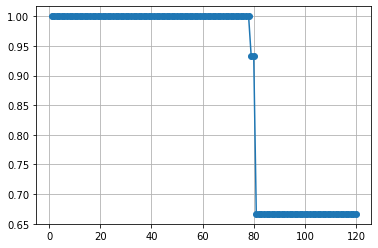

In [63]:
plt.plot(k_values, accuracies, 'o-')
plt.grid()
plt.show()

* knn.predict -> 예측값 : 0 (setosa), 1(no-setosa)

* knn.predict_proba -> 예측 확률 : 4/5 , 1/5

# 다중 클래스 분류(Multi-class classification)

In [64]:
# X: 특성 행렬(150,4) , y:타겟 배열(150,)
X,y = iris.data.copy(), iris.target.copy()
X.shape, y.shape

((150, 4), (150,))

In [65]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

## 훈련/테스트셋 분리

In [67]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [77]:
X_tr.shape, X_te.shape

((120, 4), (30, 4))

In [68]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [71]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

## 특성 스케일링

In [72]:
scaler = StandardScaler() # Scaler 객체 생성

In [74]:
X_tr_scaled = scaler.fit_transform(X_tr) # 훈련 셋 스케일링

In [75]:
X_te_scaled = scaler.transform(X_te) # 테스트 셋 스케일링

## Knn 모델 훈련, 평가

In [78]:
knn = KNeighborsClassifier() #모델 생성

In [79]:
knn.fit(X_tr_scaled, y_tr) #모델 훈련

KNeighborsClassifier()

In [81]:
tr_pred = knn.predict(X_tr_scaled) # 훈련셋 예측값 -> shape: (120,)
tr_pred[:6]

array([0, 1, 1, 0, 1, 2])

In [82]:
tr_proba = knn.predict_proba(X_tr_scaled) # 훈련 셋 예측확률 -> shape(120,3)
tr_proba[:6]

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8]])

In [85]:
knn.score(X_tr_scaled,y_tr) # 훈련 셋 정확도

0.975

In [87]:
accuracy_score(y_tr, tr_pred)

0.975

In [88]:
confusion_matrix(y_tr, tr_pred) # 훈련셋에서의 오차 행렬
# 대각선은 제대로 맞힌 것, 행은 실제값 , 컬럼은 예측값

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

* 실제 versicolor 40개중 39개는 맞히고 1개는 virginica로 잘못 예측했다.

* 실제 virginica 40개중 38개는 맞히고 2개는 versicolor로 잘못 예측했다.

In [90]:
report = classification_report(y_tr, tr_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [83]:
te_pred = knn.predict(X_te_scaled) # 테스트셋 예측값 
te_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 0, 2, 0])

In [86]:
knn.score(X_te_scaled,y_te) # 테스트 셋 정확도

0.9333333333333333

In [91]:
# 어디서 틀렸는지 확인하기 위해 오차행렬을 통해 알아본다.
confusion_matrix(y_te, te_pred) #테스트셋에서의 오차 행렬

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

* 실제 virginica 10개중 8개는 맞히고 2개는 versicolor로 잘못 예측했다.

In [92]:
report2 = classification_report(y_te, te_pred)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [96]:
from sklearn.metrics import precision_score, recall_score

In [102]:
precision_score(y_te, te_pred, average=None)
# None 인경우 각 클래스의 점수가 반환됩니다. 

array([1.        , 0.83333333, 1.        ])

In [99]:
recall_score(y_te, te_pred, average=None)

array([1. , 1. , 0.8])

* 과대적합(overfitting): 훈련 셋에서의 평가 점수가 테스트 셋에서의 평가 점수보다 많이 높은 경우.
 * 일반적으로, 지도학습에서는 과대적합이 발생하는 경우가 많음.
 * 과대적합이 너무 크면 학습되지 않은 데이터에서는 오차가 크게 발생.
 * 일반적으로 지도학습에서는 과대적합이 발생하는 경우가 많음.
 * 과적합의 크기(정도)가 작을 수록 좋은 모델.
 * 과적합을 줄이기 위한 방법 -> 규제(regularization)적용.
* 과소적합(underfitting): 훈련 셋에서의 평가 점수가 테스트 셋에서의 평가 점수보다 낮은 경우.
 * 보통 샘플의 개수가 적은 경우 과소적합이 나타나는 경우가 있음.
 * 훈련 셋 샘플을 더 많이 수집해서 모델을 훈련시키면 과소적합을 해결할 수 있음.
 * **교차 검증(cross validation)**을 사용해서 훈련 셋의 크기를 늘려주는 효과를 줄 수도 있음.

# k값 변화에 따른 훈련 셋과 테스트 셋의 정확도

In [107]:
k_values = np.arange(1,40) # knn에서 사용할 n_neighbors의 개수 (값의 범위)
train_score = [] # 훈련 셋에서 계산한 정확도를 저장할 리스트
test_score = [] # 테스트셋에서 계산한 정확도를 저장할 리스트
for k in k_values: #k 값을 1~40까지 변화시키면서 반복.
    knn = KNeighborsClassifier(n_neighbors=k) # knn 모델생성
    knn.fit(X_tr_scaled, y_tr) # 스케일된 X와 훈련 레이블로 모델훈련시킨다
    acc = knn.score(X_tr_scaled, y_tr) # 훈련셋의 정확도
    train_score.append(acc) # 훈련 리스트에 추가
    acc2 = knn.score(X_te_scaled, y_te) # 테스트셋의 정확도
    test_score.append(acc2) # 테스트 리스트에 추가

In [108]:
print(train_score)
print(test_score)

[1.0, 0.9666666666666667, 0.9583333333333334, 0.9583333333333334, 0.975, 0.9583333333333334, 0.975, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.9416666666666667, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9333333333333333, 0.9333333333333333, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9, 0.8916666666666667, 0.8916666666666667, 0.8833333333333333, 0.875, 0.8833333333333333, 0.8833333333333333, 0.8916666666666667, 0.8916666666666667]
[0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.966666

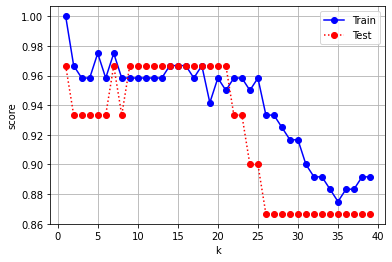

In [120]:
# k값에 따른 훈련셋과 테스트 셋 정확도 변화
#훈련 셋 정확도 시각화
plt.plot(k_values, train_score, 'bo-',label='Train')
#테스트 셋 정확도 시각화
plt.plot(k_values, test_score, 'ro:',label='Test')

plt.legend()
plt.grid()
plt.xlabel('k')
plt.ylabel('score')
plt.show()